In [55]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [56]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [57]:
df= pd.read_csv("../../data/processed/oline_merge.csv")
df = df[df.year >= df.draft_yr+3]
df = df[df['Percenthit (%)'] <= 6]
# df =df[df.year != 2020]
len(df)

269

In [58]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,year,age,draft_yr,draft_pos,attempts,yards_run,tds_run,longgain_run,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,304.513011,304.513011,2015.156134,27.460967,2009.903346,114.553903,132.527881,558.007435,3.866171,36.167286,...,0.921933,9.405204,28.386617,5.827881,2.112268,16.586989,1.587361,16.903346,17.609665,16.130112
std,163.572650,163.572650,3.266429,2.496894,3.845664,93.322592,89.170578,396.784764,3.598913,20.313722,...,1.247925,7.007148,15.419240,1.777976,1.209986,10.729167,1.500245,9.207291,9.091577,9.050531
min,0.000000,0.000000,2005.000000,22.000000,1999.000000,2.000000,2.000000,-3.000000,0.000000,3.000000,...,0.000000,0.000000,3.000000,-0.400000,0.100000,-0.300000,0.000000,1.000000,1.000000,1.000000
25%,178.000000,178.000000,2013.000000,26.000000,2007.000000,36.000000,51.000000,223.000000,1.000000,20.000000,...,0.000000,4.000000,17.000000,4.700000,1.100000,8.400000,0.000000,9.000000,10.000000,8.000000
50%,303.000000,303.000000,2015.000000,27.000000,2010.000000,73.000000,119.000000,473.000000,3.000000,32.000000,...,1.000000,8.000000,25.000000,5.800000,2.000000,14.500000,1.000000,17.000000,18.000000,16.000000
75%,449.000000,449.000000,2018.000000,29.000000,2013.000000,227.000000,206.000000,863.000000,6.000000,48.000000,...,1.000000,13.000000,35.000000,6.600000,2.900000,23.400000,3.000000,24.000000,25.000000,24.000000
max,599.000000,599.000000,2020.000000,37.000000,2017.000000,257.000000,392.000000,1845.000000,18.000000,97.000000,...,7.000000,32.000000,80.000000,12.200000,6.300000,58.700000,6.000000,32.000000,32.000000,32.000000


In [59]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)

# df = df.drop('yards_run',axis=1)
# df = df.drop('yards_rec',axis=1)
# df = df.drop('attempts',axis=1)
# df = df.drop('rec',axis=1)
# df = df.drop('recpergame',axis=1)
# df = df.drop('yardspergame_rec',axis=1)
# df = df.drop('yardspergame_run',axis=1)
# df = df.drop('tgt',axis=1)

df.describe()


,age,draft_pos,attempts,yards_run,tds_run,longgain_run,Percenthit (%),g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,27.460967,114.553903,132.527881,558.007435,3.866171,36.167286,2.016015,12.472119,7.312268,35.271375,26.483271,210.040892,0.921933,9.405204,28.386617,1.587361,16.903346,17.609665,16.130112
std,2.496894,93.322592,89.170578,396.784764,3.598913,20.313722,1.460674,3.843506,5.576393,22.832877,17.482526,149.632816,1.247925,7.007148,15.419240,1.500245,9.207291,9.091577,9.050531
min,22.000000,2.000000,2.000000,-3.000000,0.000000,3.000000,0.100644,1.000000,0.000000,2.000000,2.000000,-2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000
25%,26.000000,36.000000,51.000000,223.000000,1.000000,20.000000,0.727987,10.000000,2.000000,16.000000,12.000000,87.000000,0.000000,4.000000,17.000000,0.000000,9.000000,10.000000,8.000000
50%,27.000000,73.000000,119.000000,473.000000,3.000000,32.000000,1.658375,14.000000,7.000000,30.000000,22.000000,180.000000,1.000000,8.000000,25.000000,1.000000,17.000000,18.000000,16.000000
75%,29.000000,227.000000,206.000000,863.000000,6.000000,48.000000,2.886179,16.000000,12.000000,51.000000,38.000000,314.000000,1.000000,13.000000,35.000000,3.000000,24.000000,25.000000,24.000000
max,37.000000,257.000000,392.000000,1845.000000,18.000000,97.000000,5.944167,16.000000,16.000000,104.000000,77.000000,704.000000,7.000000,32.000000,80.000000,6.000000,32.000000,32.000000,32.000000


In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [61]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
esv = []
# while True: 
for i in range(10):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(16, activation="relu"))
    
#     a=random.randint(18,21)
#     b=random.randint(35,37)
#     c=random.randint(28,30)


    a=random.randint(35,45)
    b=random.randint(35,49)
    c=random.randint(35,45)

    
    model.add(Dense(a, activation="relu"))
    model.add(Dense(b, activation="relu"))
    model.add(Dense(c, activation="relu"))
    
    
    print('a= ',a,', b= ',b,', c= ',c)
    
#     model.add(Dense(random.randint(30,40), activation="relu"))
    
#     model.add(Dense(random.randint(30,40), activation="relu"))
    

    model.add(Dense(1))

    model.compile(optimizer="sgd", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=50)
    
    print(model.summary())
    predictions = model.predict(X_test)
    esv.append(explained_variance_score(y_test,predictions))
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .40):
        winsound.Beep(1047, 62)
        break
#     winsound.Beep(1397,250)

esv.sort(reverse=True)
print("\n")
print("MAX: " + str(max(esv)))
print("AVG: " + str(sum(esv)/len(esv)))
print('\n')
print(esv)
winsound.Beep(784, 62)

a=  41 , b=  47 , c=  42
Epoch 1/50
7/7 [==============================] - 0s 16ms/step - loss: 4.6866 - val_loss: 2.9217
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 2.3152 - val_loss: 1.9262
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.8604 - val_loss: 1.9064
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 1.8326 - val_loss: 1.8821
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8072 - val_loss: 1.8813
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 1.7761 - val_loss: 1.8594
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 1.7775 - val_loss: 1.8575
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 1.7486 - val_loss: 1.8320
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 1.7634 - val_loss: 1.8130
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 1.7130 - val_loss: 1.7981
Epoch 11/50
7

7/7 [==============================] - 0s 4ms/step - loss: 1.5623 - val_loss: 1.5455
Epoch 17/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5584 - val_loss: 1.5399
Epoch 18/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5597 - val_loss: 1.6069
Epoch 19/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5496 - val_loss: 1.4992
Epoch 20/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5318 - val_loss: 1.5079
Epoch 21/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5511 - val_loss: 1.5206
Epoch 22/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5399 - val_loss: 1.4995
Epoch 23/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5394 - val_loss: 1.4603
Epoch 24/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5204 - val_loss: 1.5046
Epoch 25/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5223 - val_loss: 1.4448
Epoch 26/50
7/7 [=========================

7/7 [==============================] - 0s 4ms/step - loss: 1.5529 - val_loss: 1.5657
Epoch 32/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5747 - val_loss: 1.6843
Epoch 33/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5828 - val_loss: 1.7500
Epoch 34/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5932 - val_loss: 1.5481
Epoch 35/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5416 - val_loss: 1.5748
Epoch 36/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5679 - val_loss: 1.5588
Epoch 37/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5499 - val_loss: 1.5795
Epoch 38/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5507 - val_loss: 1.5751
Epoch 39/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5587 - val_loss: 1.6801
Epoch 40/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5810 - val_loss: 1.5907
Epoch 41/50
7/7 [=========================

7/7 [==============================] - 0s 4ms/step - loss: 1.4641 - val_loss: 1.4121
Epoch 47/50
7/7 [==============================] - 0s 5ms/step - loss: 1.4808 - val_loss: 1.4735
Epoch 48/50
7/7 [==============================] - 0s 4ms/step - loss: 1.4537 - val_loss: 1.4256
Epoch 49/50
7/7 [==============================] - 0s 4ms/step - loss: 1.4555 - val_loss: 1.4912
Epoch 50/50
7/7 [==============================] - 0s 4ms/step - loss: 1.4400 - val_loss: 1.5710
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_390 (Dense)            (None, 16)                304       
_________________________________________________________________
dense_391 (Dense)            (None, 44)                748       
_________________________________________________________________
dense_392 (Dense)            (None, 45)                2025      
__________________________________________



ESV: 0.23896085982264337



a=  39 , b=  39 , c=  41
Epoch 1/50
7/7 [==============================] - 0s 19ms/step - loss: 4.5762 - val_loss: 2.6954
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 2.2771 - val_loss: 1.9526
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 1.9768 - val_loss: 1.9415
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 1.9541 - val_loss: 1.9221
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 1.9408 - val_loss: 1.9202
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 1.9194 - val_loss: 1.8970
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 1.9074 - val_loss: 1.9552
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8699 - val_loss: 1.8761
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8354 - val_loss: 1.8934
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8858 - 

7/7 [==============================] - 0s 4ms/step - loss: 1.6386 - val_loss: 1.7775
Epoch 17/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6339 - val_loss: 1.7394
Epoch 18/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6358 - val_loss: 1.7590
Epoch 19/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6142 - val_loss: 1.7740
Epoch 20/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5978 - val_loss: 1.6722
Epoch 21/50
7/7 [==============================] - 0s 5ms/step - loss: 1.6296 - val_loss: 1.7418
Epoch 22/50
7/7 [==============================] - 0s 5ms/step - loss: 1.6091 - val_loss: 1.6761
Epoch 23/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5790 - val_loss: 1.7518
Epoch 24/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6274 - val_loss: 1.6430
Epoch 25/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5748 - val_loss: 1.5945
Epoch 26/50
7/7 [=========================

7/7 [==============================] - 0s 5ms/step - loss: 1.5531 - val_loss: 1.5186
Epoch 32/50
7/7 [==============================] - 0s 6ms/step - loss: 1.5800 - val_loss: 1.5544
Epoch 33/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5841 - val_loss: 1.5561
Epoch 34/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5778 - val_loss: 1.5338
Epoch 35/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5450 - val_loss: 1.5968
Epoch 36/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5355 - val_loss: 1.5292
Epoch 37/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5678 - val_loss: 1.5056
Epoch 38/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5276 - val_loss: 1.4910
Epoch 39/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5505 - val_loss: 1.4891
Epoch 40/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5499 - val_loss: 1.5648
Epoch 41/50
7/7 [=========================

7/7 [==============================] - 0s 4ms/step - loss: 1.5043 - val_loss: 1.4107
Epoch 47/50
7/7 [==============================] - 0s 4ms/step - loss: 1.4950 - val_loss: 1.3885
Epoch 48/50
7/7 [==============================] - 0s 5ms/step - loss: 1.4857 - val_loss: 1.3788
Epoch 49/50
7/7 [==============================] - 0s 4ms/step - loss: 1.4639 - val_loss: 1.3843
Epoch 50/50
7/7 [==============================] - 0s 4ms/step - loss: 1.4928 - val_loss: 1.3831
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_415 (Dense)            (None, 16)                304       
_________________________________________________________________
dense_416 (Dense)            (None, 41)                697       
_________________________________________________________________
dense_417 (Dense)            (None, 38)                1596      
__________________________________________



ESV: 0.32172525828418375





MAX: 0.3606268220954971
AVG: 0.323774738947975


[0.3606268220954971, 0.35880571042146503, 0.34434486762075167, 0.3363995430391429, 0.32928336743739484, 0.3251016485600462, 0.32172525828418375, 0.32097751175573275, 0.3015218004428927, 0.23896085982264337]


In [ ]:
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

In [50]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 16)                304       
_________________________________________________________________
dense_76 (Dense)             (None, 19)                323       
_________________________________________________________________
dense_77 (Dense)             (None, 35)                700       
_________________________________________________________________
dense_78 (Dense)             (None, 29)                1044      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 30        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'real')

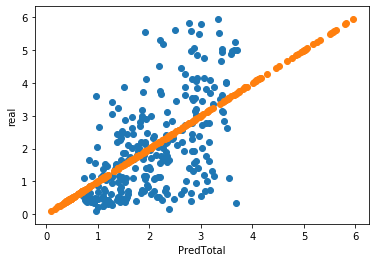

In [48]:
X_scl = scaler.fit_transform(X)
predTotal = model.predict(X_scl)
plt.scatter(predTotal,y)
plt.scatter(y,y)
plt.xlabel("PredTotal")
plt.ylabel('real')

In [11]:
bigpred = [i for i in predTotal if i >= 5] 
bigpred

NameError: name 'predTotal' is not defined

In [ ]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    print(model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1))))

In [ ]:
#model.save('./savedmodels/April27-norookie')

In [31]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  4.500784850833322
RMSE:  2.1215053266096984
MAE:  1.5205602826493432
ESV:  -0.46056120636169307


In [15]:
from sklearn.linear_model import LinearRegression

MAE: 0.9596240325094597
MSE: 1.525682738916666
RMSE: 1.235185305497384
ESV:  0.28225617919754986


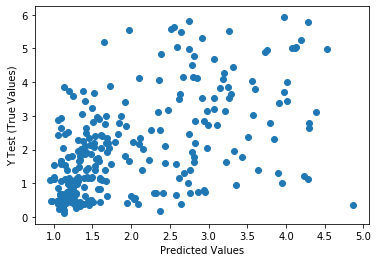

In [21]:
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)
plt.scatter(predictions,y)
plt.ylabel("Y Test (True Values)")
plt.xlabel("Predicted Values")
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

print("ESV: ", explained_variance_score(y, predictions))

In [ ]:
sns.pairplot(df,x_vars=['age','draft_pos','attempts','yards_run','tds_run','longgain_run','g','gs','tgt','rec','yards_rec','tds_rec','firstdowns','longgain_rec','fumbles','team_adjusted_line_yards','team_running_back_yards','team_stuffed_rate'],y_vars=['Percenthit (%)'])